<a href="https://colab.research.google.com/github/sriraj934/Mask_Detection/blob/main/Mask_No_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
fid = drive.ListFile({'q':"title='mask.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('mask.zip')

In [4]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [5]:
!unzip mask.zip

Streaming output truncated to the last 5000 lines.
  inflating: mask/data/train_set/with_mask/with_mask_1699.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1700.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1701.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1702.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1703.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1704.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1705.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1706.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1707.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1708.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1709.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1710.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1711.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_1712.jpg  
  inflating: mask/data/train_set/with_mask/with_mask_

In [10]:
PATH = '/content/mask/data'

In [11]:
import os
os.listdir(PATH)

['test_set', 'train_set']

In [12]:
train_dir = os.path.join(PATH,
                         'train_set')
test_dir = os.path.join(PATH,
                        'test_set')


In [13]:
train_with_mask_dir = os.path.join(train_dir,
                                'with_mask')
train_without_mask_dir = os.path.join(train_dir,
                                   'without_mask')

test_with_mask_dir = os.path.join(test_dir,
                               'with_mask')
test_without_mask_dir = os.path.join(test_dir,
                                  'without_mask')

## Now we can inspect the Dimensions of a Data

In [14]:
len(os.listdir(train_with_mask_dir))

2903

In [15]:
len(os.listdir(train_without_mask_dir))

2795

In [17]:
len(os.listdir(test_with_mask_dir))

822

In [18]:
len(os.listdir(test_without_mask_dir))

1032

### Importing the libraries

In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [20]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [21]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 5698 images belonging to 2 classes.


### Preprocessing the Test set

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1854 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [23]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',input_shape = [64,64,3]))

### Step 2 - Pooling

In [25]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

### Adding a second convolutional layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

### Step 3 - Flattening

In [27]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [28]:
cnn.add(tf.keras.layers.Dense(units= 128 , activation='relu'))

### Step 5 - Output Layer

In [29]:
cnn.add(tf.keras.layers.Dense(units= 1 , activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [30]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [31]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 25)

Epoch 1/25
  9/179 [>.............................] - ETA: 47s - loss: 0.7763 - accuracy: 0.4478

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


179/179 [==============================] - 49s 267ms/step - loss: 0.4890 - accuracy: 0.7551 - val_loss: 0.2884 - val_accuracy: 0.8894
Epoch 2/25
179/179 [==============================] - 47s 265ms/step - loss: 0.2768 - accuracy: 0.8891 - val_loss: 0.2011 - val_accuracy: 0.9207
Epoch 3/25
179/179 [==============================] - 48s 265ms/step - loss: 0.2393 - accuracy: 0.9049 - val_loss: 0.2115 - val_accuracy: 0.9191
Epoch 4/25
179/179 [==============================] - 48s 266ms/step - loss: 0.2153 - accuracy: 0.9146 - val_loss: 0.1877 - val_accuracy: 0.9315
Epoch 5/25
179/179 [==============================] - 47s 264ms/step - loss: 0.2046 - accuracy: 0.9111 - val_loss: 0.1523 - val_accuracy: 0.9509
Epoch 6/25
179/179 [==============================] - 47s 264ms/step - loss: 0.1944 - accuracy: 0.9207 - val_loss: 0.1764 - val_accuracy: 0.9369
Epoch 7/25
179/179 [==============================] - 47s 265ms/step - loss: 0.1692 - accuracy: 0.9334 - val_loss: 0.1469 - val_accuracy: 0.9

## Part 4 - Making a single prediction

# With Mask Image

Saving mask_wearing.jpg to mask_wearing.jpg
[0.]


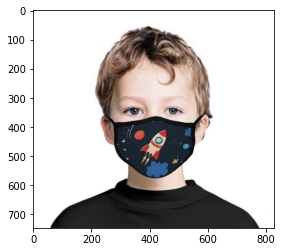

mask_wearing.jpg is Wearing a Mask !!


In [51]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 62))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    img = mpimg.imread(fn + '')
    imgplot = plt.imshow(img)
    plt.show()
    print(" is Not Wearing a Mask !! Please Wear for Safety")
  else:
    img = mpimg.imread(fn + '')
    imgplot = plt.imshow(img)
    plt.show()
    print(fn + " is Wearing a Mask !!")

## Without Mask Image

Saving teenage-boy-hairstyle.jpg to teenage-boy-hairstyle.jpg
[1.]


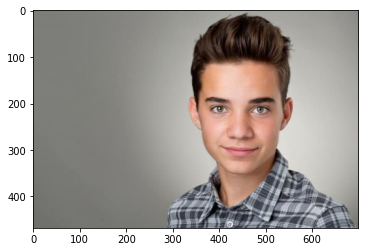

 is Not Wearing a Mask !! Please Wear for Safety


In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 62))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    img = mpimg.imread(fn + '')
    imgplot = plt.imshow(img)
    plt.show()
    print(" is Not Wearing a Mask !! Please Wear for Safety")
  else:
    img = mpimg.imread(fn + '')
    imgplot = plt.imshow(img)
    plt.show()
    print( " is Wearing a Mask !!")

In [33]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

To View a Single Image 

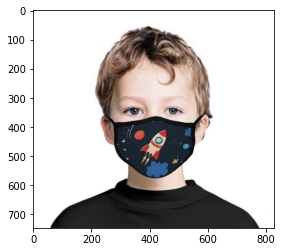

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(fn + '')
imgplot = plt.imshow(img)
plt.show()